In [1]:
import pandas as pd

In [12]:
import mysql.connector 
conn = mysql.connector.connect(
 host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",
 port = 3306,
 user = "hyun",
 password = "0774",
 database ="AutoFarming"
)
cursor = conn.cursor(buffered=True)

weather = pd.read_sql("SELECT * FROM avg_annual_temp",conn)
conn.close()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_11516\4063990812.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  weather = pd.read_sql("SELECT * FROM avg_annual_temp",conn)


In [13]:
weather.head()

,일시,평균기온,최고기온평균,최저기온평균,강수량
0,1905,12.4,16.3,9.3,1311.2
1,1906,12.0,15.8,8.8,1032.8
2,1907,12.5,16.8,9.0,627.7
3,1908,11.7,16.1,7.9,1054.4
4,1909,12.0,16.9,7.9,887.9


In [4]:
weather.set_index(' 일시',inplace=True)

In [14]:
weather.head()

,일시,평균기온,최고기온평균,최저기온평균,강수량
0,1905,12.4,16.3,9.3,1311.2
1,1906,12.0,15.8,8.8,1032.8
2,1907,12.5,16.8,9.0,627.7
3,1908,11.7,16.1,7.9,1054.4
4,1909,12.0,16.9,7.9,887.9


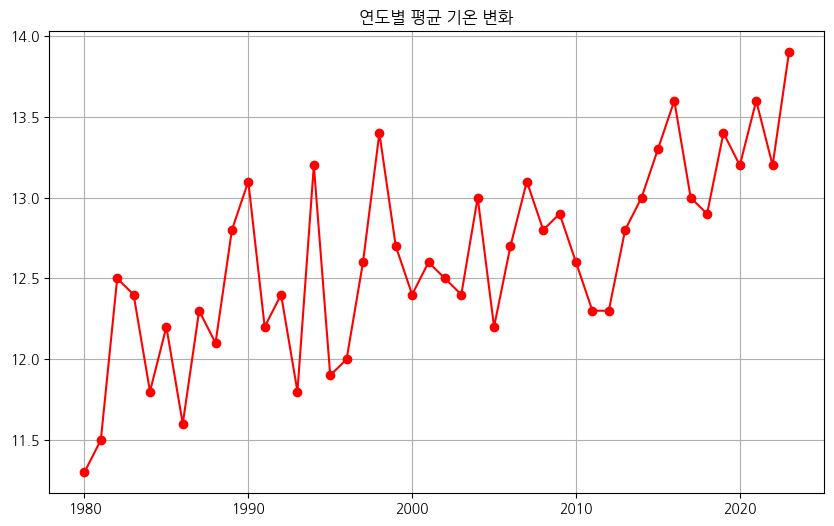

In [15]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
plt.plot(weather.index[weather.index >= 1980], weather['  평균기온'][weather.index >= 1980], marker='o', linestyle='-', color='r')

plt.title('연도별 평균 기온 변화')
plt.xlabel('')
plt.ylabel('')

plt.grid(True)
plt.show()

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
# 독립 변수와 종속 변수 설정
X = weather.index.values.reshape(-1,1)
y = weather['  평균기온']

# 선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 2024년부터 2040년까지 예측
predict_years = np.arange(2024, 2100).reshape(-1, 1)
predictions = model.predict(predict_years)

# 예측 결과를 DataFrame으로 변환
prediction_df = pd.DataFrame({'year': predict_years.flatten(), 'predicted_temperature': predictions})

# 예측 결과 출력
print(prediction_df)

    year  predicted_temperature
0   2024              12.892480
1   2025              12.898615
2   2026              12.904750
3   2027              12.910885
4   2028              12.917020
..   ...                    ...
71  2095              13.328076
72  2096              13.334212
73  2097              13.340347
74  2098              13.346482
75  2099              13.352617

[76 rows x 2 columns]


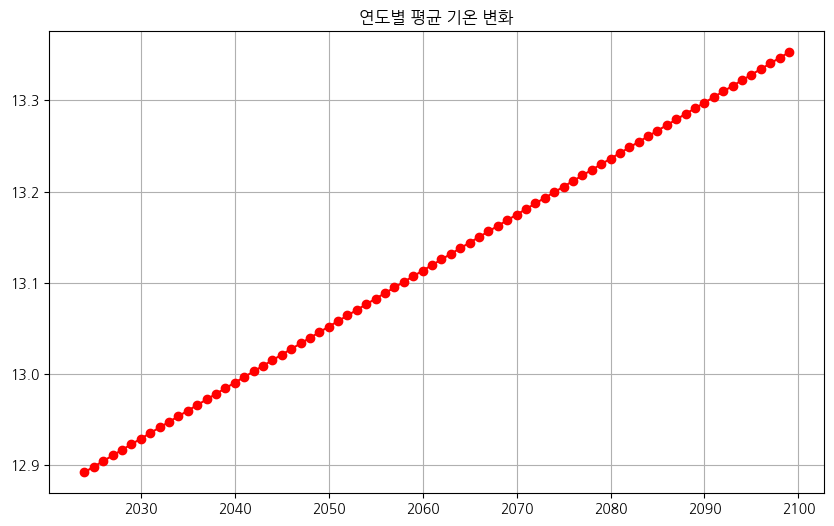

In [11]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
plt.plot(prediction_df['year'], prediction_df['predicted_temperature'], marker='o', linestyle='-', color='r')

plt.title('연도별 평균 기온 변화')
plt.xlabel('')
plt.ylabel('')

plt.grid(True)
plt.show()

10:18:37 - cmdstanpy - INFO - Chain [1] start processing
10:18:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\hyeji\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\hyeji\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\hyeji\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:228: FutureWarning: T

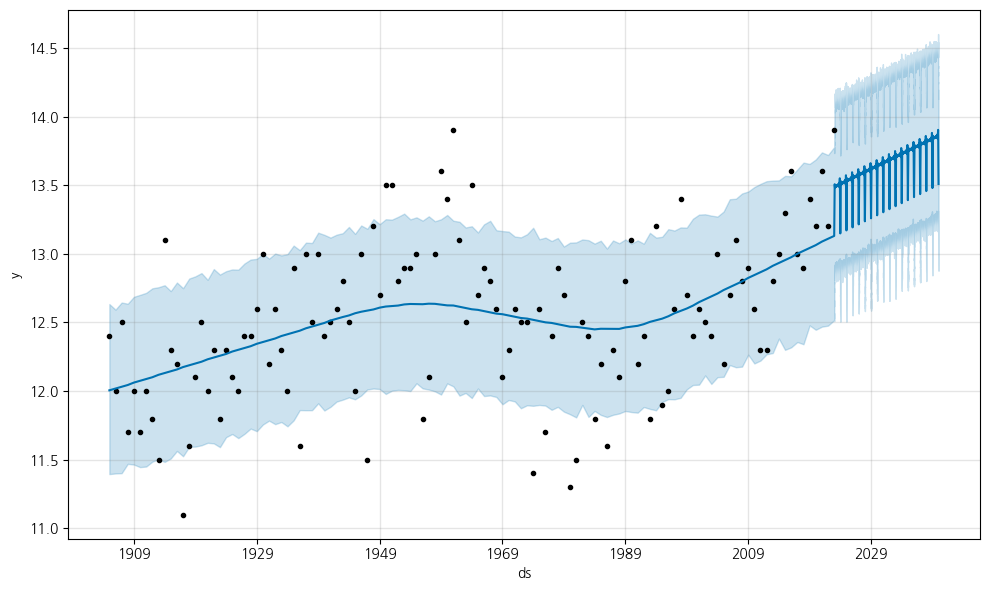

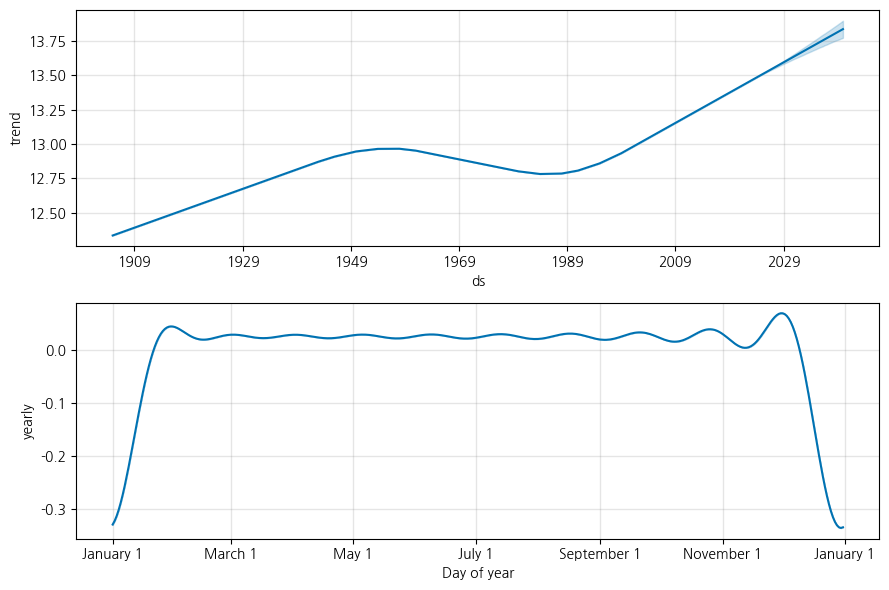

In [17]:
from prophet import Prophet
import pandas as pd

weather.rename(columns={' 일시': 'ds', '  평균기온': 'y'}, inplace=True)
weather['ds'] = pd.to_datetime(weather['ds'], format='%Y')

model = Prophet()
model.fit(weather)

future = model.make_future_dataframe(periods=(2040-2023)*365, freq='D')

future['year'] = future['ds'].dt.year
future = future[future['year'] <= 2040]

forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      119 non-null    datetime64[ns]
 1   y       119 non-null    float64       
 2   최고기온평균  119 non-null    float64       
 3   최저기온평균  119 non-null    float64       
 4   강수량     119 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.8 KB
